In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the dataset
df = pd.read_csv('UK Stock Market 1988-2024.csv')
df.head()

,Unnamed: 0,Date,Ticker,Company_Name,Open,High,Low,Close,Adj Close,Volume
0,0,2022-04-08,1SN.L,FIRST TIN PLC ORD GBP0.001,32.5,31.5,28.260000,30.000,30.000,489405.0
1,1,2022-04-11,1SN.L,FIRST TIN PLC ORD GBP0.001,30.0,31.0,29.040001,30.975,30.975,656629.0
2,2,2022-04-12,1SN.L,FIRST TIN PLC ORD GBP0.001,30.0,31.0,29.000000,30.000,30.000,1048925.0
3,3,2022-04-13,1SN.L,FIRST TIN PLC ORD GBP0.001,30.0,31.0,29.879999,30.000,30.000,179195.0
4,4,2022-04-14,1SN.L,FIRST TIN PLC ORD GBP0.001,30.0,31.0,29.000000,29.500,29.500,1177806.0


In [56]:
df.tail()

,Unnamed: 0,Date,Ticker,Company_Name,Open,High,Low,Close,Adj Close,Volume
4403208,4403208,2024-05-16,ZYT.L,ZYTRONIC ORD GBP0.01,56.5,60.000000,55.000000,57.5,57.5,1837.0
4403209,4403209,2024-05-17,ZYT.L,ZYTRONIC ORD GBP0.01,57.5,57.750000,57.750000,57.5,57.5,25000.0
4403210,4403210,2024-05-20,ZYT.L,ZYTRONIC ORD GBP0.01,57.5,56.099998,55.000000,57.5,57.5,8089.0
4403211,4403211,2024-05-21,ZYT.L,ZYTRONIC ORD GBP0.01,57.5,58.884998,58.884998,57.5,57.5,6369.0
4403212,4403212,2024-05-22,ZYT.L,ZYTRONIC ORD GBP0.01,57.5,58.500000,56.099998,57.5,57.5,3904.0


In [57]:
close=df.reset_index()['Close']
close

0          30.000
1          30.975
2          30.000
3          30.000
4          29.500
            ...  
4403208    57.500
4403209    57.500
4403210    57.500
4403211    57.500
4403212    57.500
Name: Close, Length: 4403213, dtype: float64

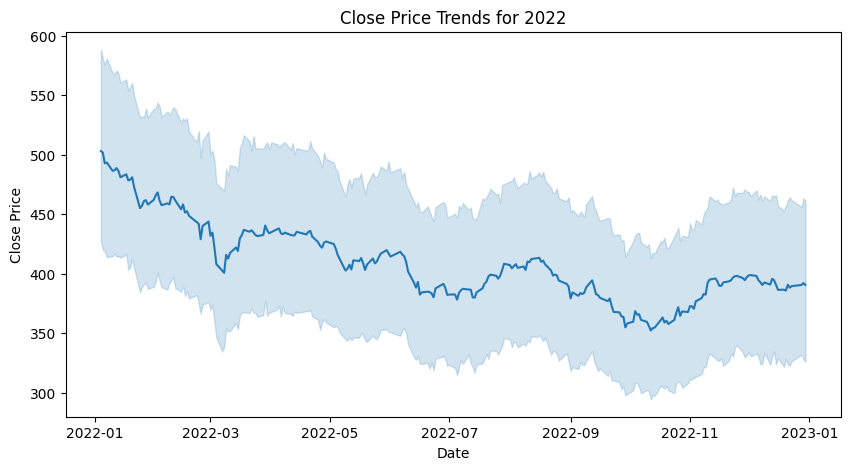

In [20]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Create the line plot for the year 2022
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2022, x='Date', y='Close')
plt.title('Close Price Trends for 2022')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

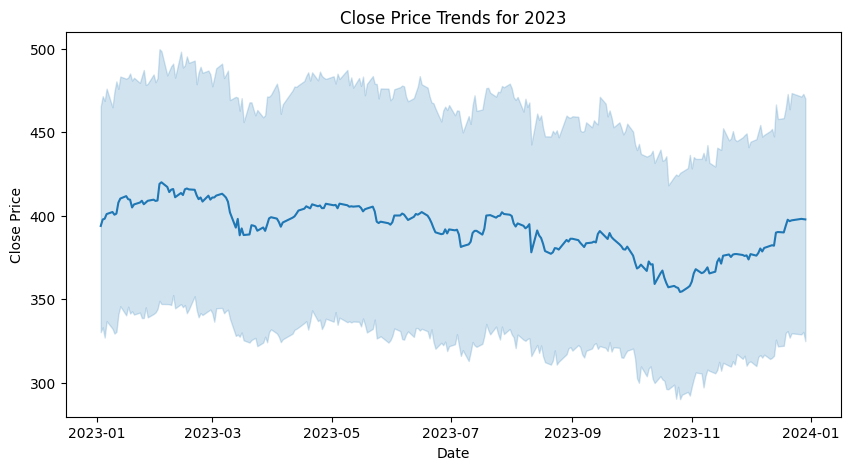

In [58]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for the year 2023
df_2023 = df[df['Date'].dt.year == 2023]

# Create the line plot for the year 2023
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2023, x='Date', y='Close')
plt.title('Close Price Trends for 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

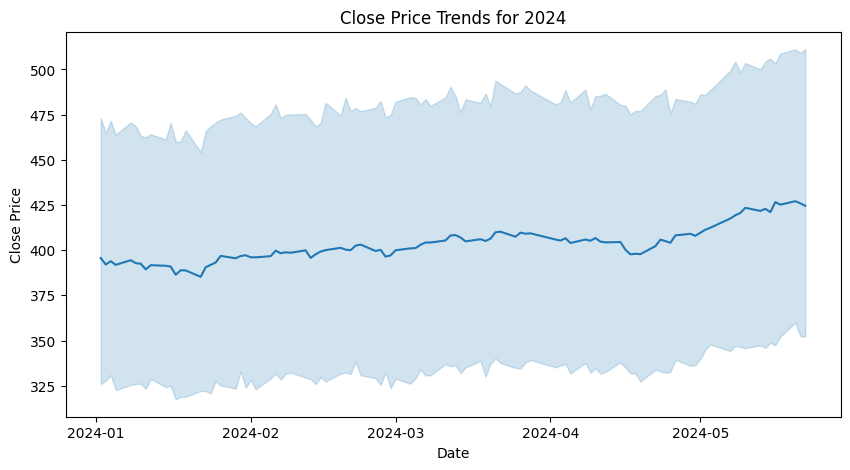

In [59]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for the year 2024
df_2024 = df[df['Date'].dt.year == 2024]

# Create the line plot for the year 2024
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2024, x='Date', y='Close')
plt.title('Close Price Trends for 2024')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [78]:
df_2024.shape

(101335, 10)

In [79]:
# split the data into training and testing sets
train_size = int(len(df_2024) * 0.75)
test_size = len(df_2024) - train_size
train_data = df_2024['Close'].values[:train_size]
test_data = df_2024['Close'].values[train_size:]
train_data.shape, test_data.shape

((76001,), (25334,))

In [80]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(df_2024['Close'].values.reshape(-1, 1), time_step)
X_test, y_test = create_dataset(df_2024['Close'].values.reshape(-1, 1), time_step)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(101234, 100)
(101234,)
(101234, 100)
(101234,)


(None, None)

In [81]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [82]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

NaNs in X_train: 5100
NaNs in y_train: 51
NaNs in X_test: 5100
NaNs in y_test: 51


In [83]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

X_test = np.nan_to_num(X_test, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)
y_test = np.nan_to_num(y_test, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

print("After cleaning:")
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())

After cleaning:
NaNs in X_test: 0
NaNs in y_test: 0
NaNs in X_train: 0
NaNs in y_train: 0


In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0, 1))
X_train = scaler_x.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test = scaler_x.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [87]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))  # Single LSTM layer with return_sequences=True
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)  # Lower LR and clip gradients
model.compile(loss='mse', optimizer=optimizer)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10,  # More epochs to observe convergence
                    batch_size=64,
                    verbose=1)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 102s 63ms/step - loss: 0.0014 - val_loss: 4.6369e-04
Epoch 2/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - loss: 4.3637e-04 - val_loss: 3.7337e-04
Epoch 3/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - loss: 3.4851e-04 - val_loss: 2.5814e-04
Epoch 4/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - loss: 2.7786e-04 - val_loss: 2.2129e-04
Epoch 5/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 103s 65ms/step - loss: 2.1494e-04 - val_loss: 1.8557e-04
Epoch 6/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - loss: 1.7410e-04 - val_loss: 1.4894e-04
Epoch 7/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 99s 62ms/step - loss: 1.4410e-04 - val_loss: 1.3104e-04
Epoch 8/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - loss: 1.2884e-04 - val_loss: 1.2024e-04
Epoch 9/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - loss: 1.2476e-04 - val_loss: 1.1257e-04
Epoch 10/10
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - loss: 1.2471e-04 - val_loss: 1.1186e-04


In [71]:
# Predict and check performance metrics
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_train_actual = scaler_y.inverse_transform(y_train)

# Calculate MSE and RMSE
import math
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train_actual, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)

103198/103198 ━━━━━━━━━━━━━━━━━━━━ 436s 4ms/step
34397/34397 ━━━━━━━━━━━━━━━━━━━━ 149s 4ms/step
Train MSE: 170763349.8764694
Train RMSE: 13067.645154214642


3164/3164 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step


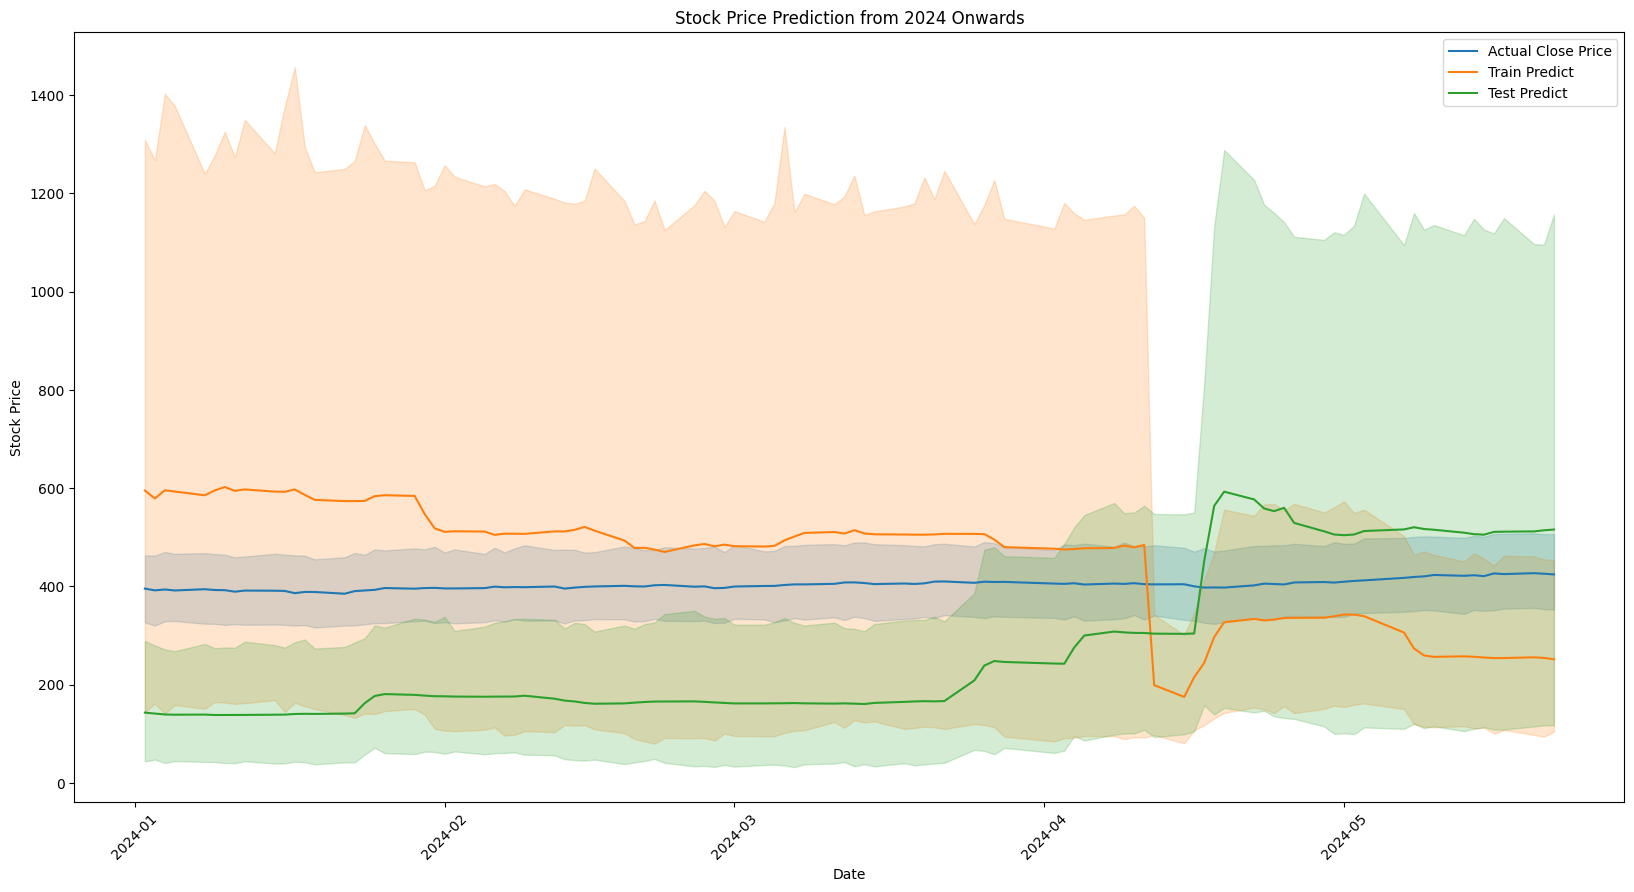

In [93]:
# Determine the starting index for 2024 in the dataset
start_2024 = df[df['Date'].dt.year == 2024].index[0]

look_back = 100

# Predict and shift train predictions for plotting from 2024 and onwards
train_predict = model.predict(X_train)
train_predict = scaler_y.inverse_transform(train_predict)
trainPredictPlot = np.empty_like(close.values.reshape(-1, 1))
trainPredictPlot[:, :] = np.nan
trainPredictPlot[start_2024:start_2024 + len(train_predict), :] = train_predict

# Predict and shift test predictions for plotting from 2024 and onwards
test_predict = model.predict(X_test)
test_predict = scaler_y.inverse_transform(test_predict)
testPredictPlot = np.empty_like(close.values.reshape(-1, 1))
testPredictPlot[:, :] = np.nan
testPredictPlot[start_2024 + len(train_predict) + look_back + 1 : start_2024 + len(train_predict) + look_back + 1 + len(test_predict), :] = test_predict[:len(testPredictPlot[start_2024 + len(train_predict) + look_back + 1 :]), :]

# Create a dataframe for plotting
plot_df = pd.DataFrame({
    'Date': df['Date'],
    'Actual': close.values,
    'Train Predict': trainPredictPlot.flatten(),
    'Test Predict': testPredictPlot.flatten()
})

# Filter the dataframe for the year 2024 and onwards
plot_df = plot_df[plot_df['Date'].dt.year >= 2024]

# Plot baseline and predictions from 2024 onwards
plt.figure(figsize=(20, 10))
sns.lineplot(data=plot_df, x='Date', y='Actual', label='Actual Close Price')
sns.lineplot(data=plot_df, x='Date', y='Train Predict', label='Train Predict')
sns.lineplot(data=plot_df, x='Date', y='Test Predict', label='Test Predict')
plt.title('Stock Price Prediction from 2024 Onwards')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

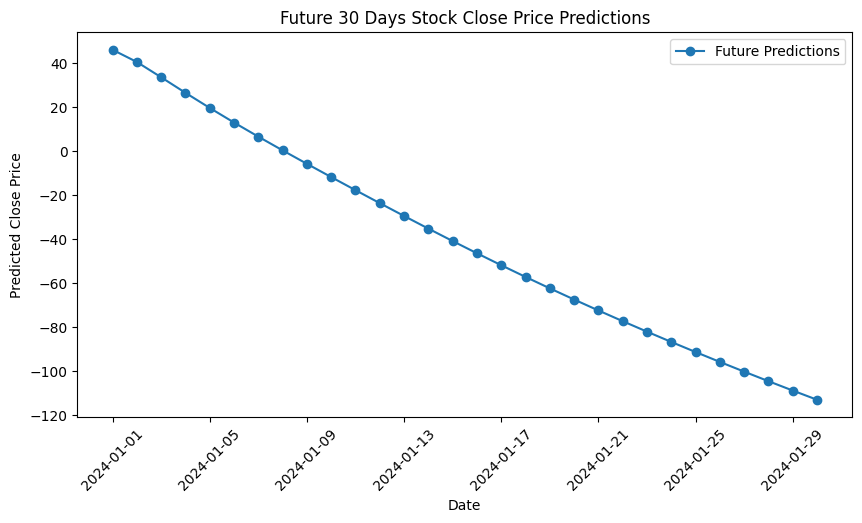

In [95]:
# Perform predictions for the next 30 days
future_days = 30
future_predictions = []
last_100_days = X_test[-1]

for i in range(future_days):
    prediction = model.predict(last_100_days.reshape(1, time_step, 1))
    future_predictions.append(prediction[0][0])
    last_100_days = np.roll(last_100_days, -1)
    last_100_days[-1] = prediction[0][0]
    
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a dataframe for the future predictions
future_dates = pd.date_range(start='2024-01-01', periods=future_days)
future_df = pd.DataFrame(future_predictions, columns=['Close'])
future_df['Date'] = future_dates
future_df.set_index('Date', inplace=True)
print(future_df.head())

# Visualize the future predictions
plt.figure(figsize=(10, 5))
plt.plot(future_df.index, future_df['Close'], marker='o', label='Future Predictions')
plt.title("Future 30 Days Stock Close Price Predictions")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()